In [1]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [2]:
guass1 = np.random.normal(0,1,(100,2))
guass2 = np.random.normal(1,1,(100,2))
data = np.vstack([guass1, guass2])
labels = np.vstack([np.ones(len(guass1)).reshape(-1,1), np.zeros(len(guass2)).reshape(-1,1)]).reshape(-1)

In [3]:
data.shape, labels.shape

((200, 2), (200,))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,labels)

In [6]:
import lightgbm as lgb
bdt = lgb.LGBMClassifier()
bdt.fit(X_train, y_train)

/Users/aishik-mac/.pyenv/versions/3.6.6/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [7]:
from sklearn.metrics import roc_auc_score
y_pred_bdt = bdt.predict_proba(X_test)[:,1]
y_pred_bdt = y_pred_bdt.ravel()
y_pred_train_bdt = bdt.predict_proba(X_train)[:,1].ravel()
auc_test = roc_auc_score(y_true=y_test, y_score=y_pred_bdt)
print (auc_test)
print (roc_auc_score(y_true=y_train, y_score=y_pred_train_bdt,))

0.884
0.9798222222222222


In [8]:
weights_test = np.ones(len(y_test))
#weights_test = np.random.normal(1,0.7,len(y_test))

# PI new

In [10]:
from permutationimportancephysics.PermutationImportance import PermulationImportance

In [11]:
pi = PermulationImportance(model=bdt, X=X_test,y=y_test,weights=weights_test,n_iterations=5000,usePredict_poba=True,
                          scoreFunction="AUC")
pi.dislayResults()

[['0.2349513599999996' '0.0009072679059848222' '0.06415352886747869'
  'feature1']
 ['0.17705391999999964' '0.000811465980634259' '0.057379309760867615'
  'feature0']]


In [12]:
pi = PermulationImportance(model=bdt, X=X_test,y=y_test,weights=weights_test,n_iterations=5000,usePredict_poba=True,
                           scoreFunction="amsasimov")
pi.dislayResults()

[['1.7637942487017444' '0.00673623291820683' '0.4763235976116096'
  'feature1']
 ['1.187514531742088' '0.008522528047408337' '0.6026337375174982'
  'feature0']]


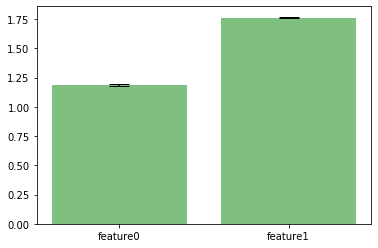

In [13]:
plt = pi.plotBars()
plt.show()